# USED CAR PRICE PREDICTION

## Predict the price of a used card depending up its specifications
## Specifications like year of production, brand, model, engine volume,mileage

In [1]:
### Import Needed Libraries to be used

In [2]:
# import needed libraries
import numpy as np
import statsmodels.api as sm
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
import seaborn as sns
sns.set()

### Import Data from CSV file

In [3]:
# The code was removed by Watson Studio for sharing.

,Brand,Price,Body,Mileage,EngineV,Engine Type,Registration,Year,Model
0,BMW,4200.0,sedan,277,2.0,Petrol,yes,1991,320
1,Mercedes-Benz,7900.0,van,427,2.9,Diesel,yes,1999,Sprinter 212
2,Mercedes-Benz,13300.0,sedan,358,5.0,Gas,yes,2003,S 500
3,Audi,23000.0,crossover,240,4.2,Petrol,yes,2007,Q7
4,Toyota,18300.0,crossover,120,2.0,Petrol,yes,2011,Rav 4


In [4]:
raw_data.tail()  # displays last five rows of dataframe

,Brand,Price,Body,Mileage,EngineV,Engine Type,Registration,Year,Model
4340,Mercedes-Benz,125000.0,sedan,9,3.0,Diesel,yes,2014,S 350
4341,BMW,6500.0,sedan,1,3.5,Petrol,yes,1999,535
4342,BMW,8000.0,sedan,194,2.0,Petrol,yes,1985,520
4343,Toyota,14200.0,sedan,31,NaN,Petrol,yes,2014,Corolla
4344,Volkswagen,13500.0,van,124,2.0,Diesel,yes,2013,T5 (Transporter)


### Lets look at data we have.
<Font color=blue>
    
- Brand: A BMW is generally more expensive than a Toyata
    
- Mileage: The more a car is driven , the cheaper it should be
    
- EngineVolume: Sports cars have large engines than economy cars
    
- Year: Year of production, the older the car the cheaper it is
</Font>
<Font color=blue>
<I>Rest are Categorical Variable we will deal with them on case-by-case basis </I> 
</Font>

### PREPROCESSING
### Exploring the data statistics of the variables

In [5]:
raw_data.describe()

,Price,Mileage,EngineV,Year
count,4173.000000,4345.000000,4195.000000,4345.000000
mean,19418.746935,161.237284,2.790734,2006.550058
std,25584.242620,105.705797,5.066437,6.719097
min,600.000000,0.000000,0.600000,1969.000000
25%,6999.000000,86.000000,1.800000,2003.000000
50%,11500.000000,155.000000,2.200000,2008.000000
75%,21700.000000,230.000000,3.000000,2012.000000
max,300000.000000,980.000000,99.990000,2016.000000


#### We only got descriptives for numerical variables (by default)

In [6]:
raw_data.describe(include='all')

,Brand,Price,Body,Mileage,EngineV,Engine Type,Registration,Year,Model
count,4345,4173.000000,4345,4345.000000,4195.000000,4345,4345,4345.000000,4345
unique,7,NaN,6,NaN,NaN,4,2,NaN,312
top,Volkswagen,NaN,sedan,NaN,NaN,Diesel,yes,NaN,E-Class
freq,936,NaN,1649,NaN,NaN,2019,3947,NaN,199
mean,NaN,19418.746935,NaN,161.237284,2.790734,NaN,NaN,2006.550058,NaN
std,NaN,25584.242620,NaN,105.705797,5.066437,NaN,NaN,6.719097,NaN
min,NaN,600.000000,NaN,0.000000,0.600000,NaN,NaN,1969.000000,NaN
25%,NaN,6999.000000,NaN,86.000000,1.800000,NaN,NaN,2003.000000,NaN
50%,NaN,11500.000000,NaN,155.000000,2.200000,NaN,NaN,2008.000000,NaN
75%,NaN,21700.000000,NaN,230.000000,3.000000,NaN,NaN,2012.000000,NaN


#### Now we have descriptives for categorical variables too !

<Font color=blue>
    
- Here, first thing we noticed that each variable has different no of obervations. This indicates there are some missing values.
- To understand this check No of counts, for each variable they are different.
- We can see unique values for categorical variables, check unique in data descriptives
- Have a look at frequency, the registration have 3947 entries, almost all of them has "Yes". Therefore, this variable is not very useful hence we can drop it.
- Also adding the reliability of a model in regression will be a very hard task.Therefore, we will drop it as well.
- A lot of information from 'Model' could be engineered from 'Brand', 'Year' and 'EngineV' So we won't be loosing too much variability.
- Later, we can make model that include model as well.
</Font>

#### Determining the Variables of interest

In [7]:
data=raw_data.drop(['Model'], axis=1)   # axis '0' means rows and '1' means columns

# Lets examine variables now
data.describe(include='all')

,Brand,Price,Body,Mileage,EngineV,Engine Type,Registration,Year
count,4345,4173.000000,4345,4345.000000,4195.000000,4345,4345,4345.000000
unique,7,NaN,6,NaN,NaN,4,2,NaN
top,Volkswagen,NaN,sedan,NaN,NaN,Diesel,yes,NaN
freq,936,NaN,1649,NaN,NaN,2019,3947,NaN
mean,NaN,19418.746935,NaN,161.237284,2.790734,NaN,NaN,2006.550058
std,NaN,25584.242620,NaN,105.705797,5.066437,NaN,NaN,6.719097
min,NaN,600.000000,NaN,0.000000,0.600000,NaN,NaN,1969.000000
25%,NaN,6999.000000,NaN,86.000000,1.800000,NaN,NaN,2003.000000
50%,NaN,11500.000000,NaN,155.000000,2.200000,NaN,NaN,2008.000000
75%,NaN,21700.000000,NaN,230.000000,3.000000,NaN,NaN,2012.000000


#### We can see missing values for variables
- We can see, Price and EngineV have missing values

##### Dealing with missing values
- Easy way to check missing values
- df.isnull() shows dataframe with that information, True stands for missing value and False for avaiable one

In [8]:
data.isnull()

,Brand,Price,Body,Mileage,EngineV,Engine Type,Registration,Year
0,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False
5,False,False,False,False,False,False,False,False
6,False,False,False,False,False,False,False,False
7,False,False,False,False,False,False,False,False
8,False,False,False,False,False,False,False,False
9,False,False,False,False,False,False,False,False


- Since in True stands for '1' and False for '0', 
- df.isnull().sum() will give sum of missing values and give no of null observations

In [9]:
data.isnull().sum()  

Brand             0
Price           172
Body              0
Mileage           0
EngineV         150
Engine Type       0
Registration      0
Year              0
dtype: int64

##### Price and EngineV are only variables with missing value.
- We will remove missing values, taking into consideration, Thumb Rule.
- Rule of Thumb, if you are removing <5% of obersvations, you are free to just remove all of the missing values

<I>
We will create new dataframe calling it data no missing values and for this we will use "df.dropna.
Since we are dropping rows here, so axis will be '0'
</I>

In [10]:
data_no_mv = data.dropna(axis=0)


- Lets check out the descriptives of new dataframe

In [11]:
data_no_mv.describe(include='all')

,Brand,Price,Body,Mileage,EngineV,Engine Type,Registration,Year
count,4025,4025.000000,4025,4025.000000,4025.000000,4025,4025,4025.000000
unique,7,NaN,6,NaN,NaN,4,2,NaN
top,Volkswagen,NaN,sedan,NaN,NaN,Diesel,yes,NaN
freq,880,NaN,1534,NaN,NaN,1861,3654,NaN
mean,NaN,19552.308065,NaN,163.572174,2.764586,NaN,NaN,2006.379627
std,NaN,25815.734988,NaN,103.394703,4.935941,NaN,NaN,6.695595
min,NaN,600.000000,NaN,0.000000,0.600000,NaN,NaN,1969.000000
25%,NaN,6999.000000,NaN,90.000000,1.800000,NaN,NaN,2003.000000
50%,NaN,11500.000000,NaN,158.000000,2.200000,NaN,NaN,2007.000000
75%,NaN,21900.000000,NaN,230.000000,3.000000,NaN,NaN,2012.000000


#### Notice, the min and max values w.r.t the mean and quantiles for each variable

### Exploring the Probability Distribution Function PDF's
- For this we will use seaborn library

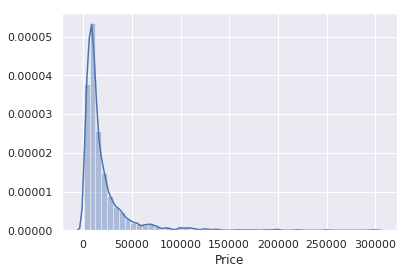

In [12]:
sns.distplot(data_no_mv['Price'])

##### Notice the descriptives of price
- Max=300000.000000
- Min=600.000000
- mean=19552.308065
- 25%= 6999.000000
- 50%=11500.000000
- 75%= 21900.000000

<I>There is huge differene, that means there are <B>outliers</B> in 'Price' Variable.</I><BR>
<I><B>'Outliers'</B> are obervations that lie on abnormal distance from other observations in the data.</I></BR>

<font color='Blue'>One way to deal with outliers seemlessly is to remove top 1% of those observations</font>

<BR>For this we will use quantile method.</BR>
<BR>DataFrame.quantile(the quantile) returns the value at a given quantile (=np.percentile).</BR>

#### Dealing with outliers

<B><Font color=RED>Price</Font></B>

In [13]:
# We will store the vaue for this in a new dataframe 'q'
q = data_no_mv['Price'].quantile(0.99)

In [14]:
# We will create new variable that will store values lower than 0.99 percentile
data_1= data_no_mv[data_no_mv['Price']<q]

In [15]:
# Lets check the descriptives now
data_1.describe(include='all')

,Brand,Price,Body,Mileage,EngineV,Engine Type,Registration,Year
count,3984,3984.000000,3984,3984.000000,3984.000000,3984,3984,3984.000000
unique,7,NaN,6,NaN,NaN,4,2,NaN
top,Volkswagen,NaN,sedan,NaN,NaN,Diesel,yes,NaN
freq,880,NaN,1528,NaN,NaN,1853,3613,NaN
mean,NaN,17837.117460,NaN,165.116466,2.743770,NaN,NaN,2006.292922
std,NaN,18976.268315,NaN,102.766126,4.956057,NaN,NaN,6.672745
min,NaN,600.000000,NaN,0.000000,0.600000,NaN,NaN,1969.000000
25%,NaN,6980.000000,NaN,93.000000,1.800000,NaN,NaN,2002.750000
50%,NaN,11400.000000,NaN,160.000000,2.200000,NaN,NaN,2007.000000
75%,NaN,21000.000000,NaN,230.000000,3.000000,NaN,NaN,2011.000000


Here the max value is 129222.000000 or 0.99 percentile.
<BR>while still far from mean but it is acceptably closer.</BR>

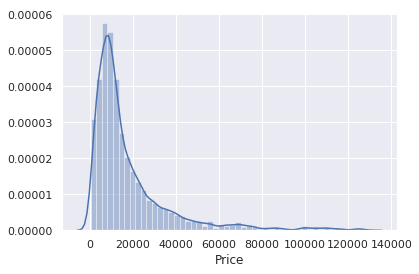

In [16]:
sns.distplot(data_1['Price'])

<font color=Blue>Data is still the same way as earlier but with less outliers </font>

<font color=Blue><I><B>Note:</B> We have same outlier case will EngineV and Mileage and will will deal in simliar way</I></font>

<B><Font color=Red>Mileage</Font></B>

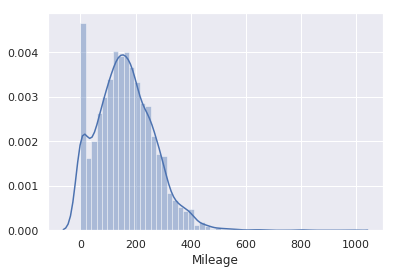

In [17]:
sns.distplot(data_no_mv['Mileage'])

In [18]:
q = data_1['Mileage'].quantile(0.99)
data_2=data_1[data_1['Mileage']<q]

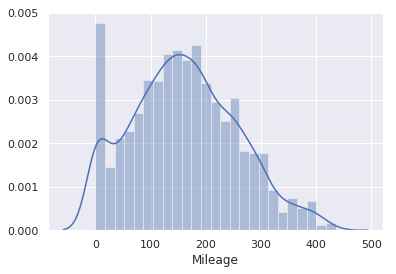

In [19]:
# Check the improved result
sns.distplot(data_2['Mileage'])

<B><Font color=Red>EngineV</Font></B>

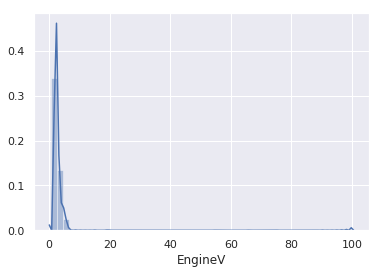

In [20]:
sns.distplot(data_no_mv['EngineV'])

<Font color=blue>

- PDF looks strange for this, So if we will look at data we will find values like 99.99 more often. These are not usual values.
- quick search in google confirms that the engine volume should normally fall is 0.6 to 6.5
- Therfore, values like 99.99 are incorrect entries.
- Actually, a common way of labeling missing values is by assigning 99.99
- Here, we have a benchmark 0.6 to 6.5. So, we will remove values lower than 6.5.
 </Font>

In [21]:
data_3=data_2[data_2['EngineV']<6.5]

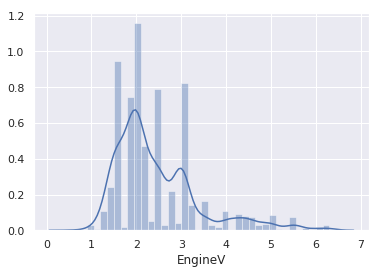

In [22]:
sns.distplot(data_3['EngineV'])

<B><Font color=RED>Year</Font></B>

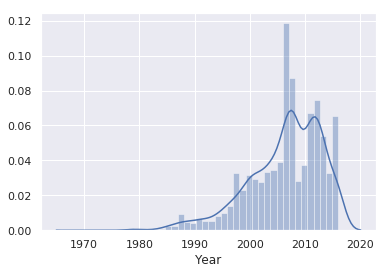

In [23]:
sns.distplot(data_no_mv['Year'])

Notice all cars are new but there seems to be some vintage cars as well

In [24]:
# This time we will take first perentile then will keep all observations that are higher
q=data_3['Year'].quantile(0.01)
data_4=data_3[data_3['Year']>q]

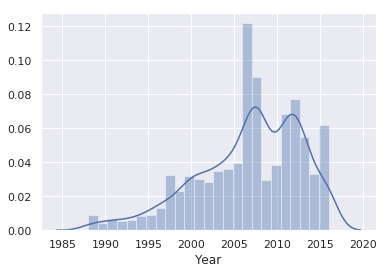

In [25]:
sns.distplot(data_4['Year'])

### We will create new cleaned dataframe along with  fresh index excluding the ones for removed observartions

In [26]:
data_cleaned=data_4.reset_index(drop=True)

#### New descriptives for our dataframe

In [27]:
data_cleaned.describe(include='all')

,Brand,Price,Body,Mileage,EngineV,Engine Type,Registration,Year
count,3867,3867.000000,3867,3867.000000,3867.000000,3867,3867,3867.000000
unique,7,NaN,6,NaN,NaN,4,2,NaN
top,Volkswagen,NaN,sedan,NaN,NaN,Diesel,yes,NaN
freq,848,NaN,1467,NaN,NaN,1807,3505,NaN
mean,NaN,18194.455679,NaN,160.542539,2.450440,NaN,NaN,2006.709853
std,NaN,19085.855165,NaN,95.633291,0.949366,NaN,NaN,6.103870
min,NaN,800.000000,NaN,0.000000,0.600000,NaN,NaN,1988.000000
25%,NaN,7200.000000,NaN,91.000000,1.800000,NaN,NaN,2003.000000
50%,NaN,11700.000000,NaN,157.000000,2.200000,NaN,NaN,2008.000000
75%,NaN,21700.000000,NaN,225.000000,3.000000,NaN,NaN,2012.000000


### Checking the OLS Assumptions

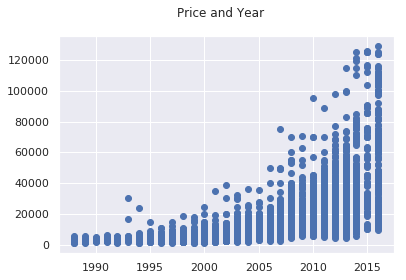

In [28]:
plt.scatter(data_cleaned['Year'], data_cleaned['Price'])
plt.suptitle('Price and Year')
plt.show()

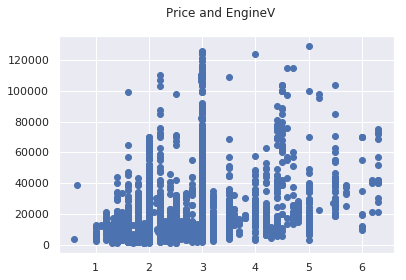

In [29]:
plt.scatter(data_cleaned['EngineV'], data_cleaned['Price'])
plt.suptitle('Price and EngineV')
plt.show()

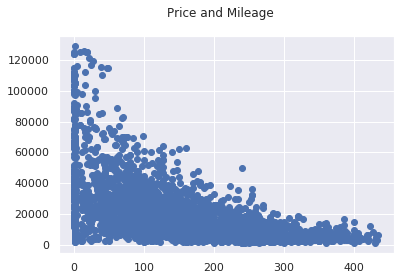

In [30]:
plt.scatter(data_cleaned['Mileage'], data_cleaned['Price'])
plt.suptitle('Price and Mileage')
plt.show()

<B>Obervations from above plots</B>
- We can spot pattens but not linear, therefore, can not run Linear Regression in this case.
- Therfore,need to first transform one or more variables.
- Patterns look quite exponential, there for will use log transformations

In [31]:
# lets take the log of price and create the plot again

log_price= np.log(data_cleaned['Price'])  # Find log of price
data_cleaned['log_price']=log_price       # add new column 'log_price' having log_price values to dataframe 'data_cleaned'
data_cleaned.head()

,Brand,Price,Body,Mileage,EngineV,Engine Type,Registration,Year,log_price
0,BMW,4200.0,sedan,277,2.0,Petrol,yes,1991,8.342840
1,Mercedes-Benz,7900.0,van,427,2.9,Diesel,yes,1999,8.974618
2,Mercedes-Benz,13300.0,sedan,358,5.0,Gas,yes,2003,9.495519
3,Audi,23000.0,crossover,240,4.2,Petrol,yes,2007,10.043249
4,Toyota,18300.0,crossover,120,2.0,Petrol,yes,2011,9.814656


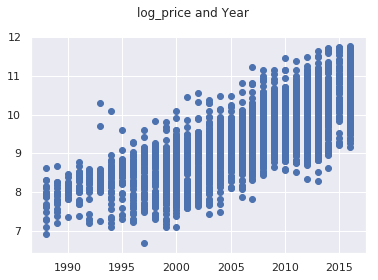

In [32]:
plt.scatter(data_cleaned['Year'], data_cleaned['log_price'])
plt.suptitle('log_price and Year')
plt.show()

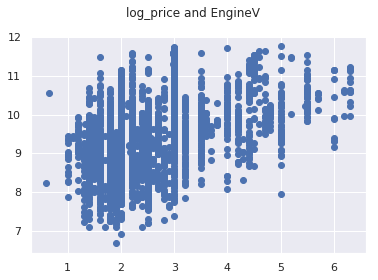

In [33]:
plt.scatter(data_cleaned['EngineV'], data_cleaned['log_price'])
plt.suptitle('log_price and EngineV')
plt.show()

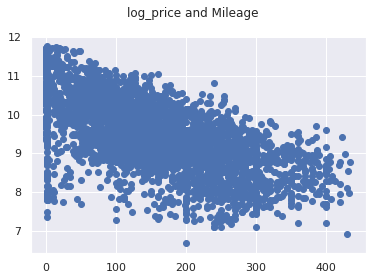

In [34]:
plt.scatter(data_cleaned['Mileage'], data_cleaned['log_price'])
plt.suptitle('log_price and Mileage')
plt.show()

#### Lets drop the original price column from the dataframe as its no longer needed

In [35]:
data_cleaned=data_cleaned.drop(['Price'],axis=1)

In [36]:
data_cleaned.head()

,Brand,Body,Mileage,EngineV,Engine Type,Registration,Year,log_price
0,BMW,sedan,277,2.0,Petrol,yes,1991,8.342840
1,Mercedes-Benz,van,427,2.9,Diesel,yes,1999,8.974618
2,Mercedes-Benz,sedan,358,5.0,Gas,yes,2003,9.495519
3,Audi,crossover,240,4.2,Petrol,yes,2007,10.043249
4,Toyota,crossover,120,2.0,Petrol,yes,2011,9.814656


### MULTICOLLINEARITY

In [37]:
data_cleaned.columns.values

array(['Brand', 'Body', 'Mileage', 'EngineV', 'Engine Type',
       'Registration', 'Year', 'log_price'], dtype=object)

- It is logical that 'Year' and 'Mileage' will be corelated. 
- The newer the car the lower its mileage.

#### We will use VIF(variance inflation factor) to check multicollinearity

In [38]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
variables=data_cleaned[['Mileage','Year','EngineV']]
vif= pd.DataFrame()
vif["VIF"]=[variance_inflation_factor(variables.values,i) for i in range (variables.shape[1])]
vif["features"] = variables.columns

In [39]:
vif

,VIF,features
0,3.791584,Mileage
1,10.354854,Year
2,7.662068,EngineV


<Font color=blue>
    
- when VIF= 1 means there is no multi collinearity
- VIF values between 1 and 5 are considered perfectly oke
-  VIF values greater than 5 are unacceptable 
- Some say VIF values greater than 7 are unacceptable 
- At times, people say VIF values greater than 10 are unacceptable

- Here, VIF for year is more than 10. So, we can definitely remove it as it will have multicollinearity with most variables
</Font>

In [40]:
data_no_multicollinearity= data_cleaned.drop(['Year'],axis=1)

In [41]:
data_no_multicollinearity.head()

,Brand,Body,Mileage,EngineV,Engine Type,Registration,log_price
0,BMW,sedan,277,2.0,Petrol,yes,8.342840
1,Mercedes-Benz,van,427,2.9,Diesel,yes,8.974618
2,Mercedes-Benz,sedan,358,5.0,Gas,yes,9.495519
3,Audi,crossover,240,4.2,Petrol,yes,10.043249
4,Toyota,crossover,120,2.0,Petrol,yes,9.814656


### Create Dummies for categorical data

In [42]:
data_with_dummies=pd.get_dummies(data_no_multicollinearity, drop_first=True)

In [43]:
data_with_dummies.head()

,Mileage,EngineV,log_price,Brand_BMW,Brand_Mercedes-Benz,Brand_Mitsubishi,Brand_Renault,Brand_Toyota,Brand_Volkswagen,Body_hatch,Body_other,Body_sedan,Body_vagon,Body_van,Engine Type_Gas,Engine Type_Other,Engine Type_Petrol,Registration_yes
0,277,2.0,8.342840,1,0,0,0,0,0,0,0,1,0,0,0,0,1,1
1,427,2.9,8.974618,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1
2,358,5.0,9.495519,0,1,0,0,0,0,0,0,1,0,0,1,0,0,1
3,240,4.2,10.043249,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1
4,120,2.0,9.814656,0,0,0,0,1,0,0,0,0,0,0,0,0,1,1


#### Rearrange a bit

In [44]:
data_with_dummies.columns.values

array(['Mileage', 'EngineV', 'log_price', 'Brand_BMW',
       'Brand_Mercedes-Benz', 'Brand_Mitsubishi', 'Brand_Renault',
       'Brand_Toyota', 'Brand_Volkswagen', 'Body_hatch', 'Body_other',
       'Body_sedan', 'Body_vagon', 'Body_van', 'Engine Type_Gas',
       'Engine Type_Other', 'Engine Type_Petrol', 'Registration_yes'],
      dtype=object)

In [45]:
cols= ['log_price','Mileage', 'EngineV', 'Brand_BMW',
       'Brand_Mercedes-Benz', 'Brand_Mitsubishi', 'Brand_Renault',
       'Brand_Toyota', 'Brand_Volkswagen', 'Body_hatch', 'Body_other',
       'Body_sedan', 'Body_vagon', 'Body_van', 'Engine Type_Gas',
       'Engine Type_Other', 'Engine Type_Petrol', 'Registration_yes']

In [46]:
data_preprocessed=data_with_dummies[cols]

In [47]:
data_preprocessed.head()

,log_price,Mileage,EngineV,Brand_BMW,Brand_Mercedes-Benz,Brand_Mitsubishi,Brand_Renault,Brand_Toyota,Brand_Volkswagen,Body_hatch,Body_other,Body_sedan,Body_vagon,Body_van,Engine Type_Gas,Engine Type_Other,Engine Type_Petrol,Registration_yes
0,8.342840,277,2.0,1,0,0,0,0,0,0,0,1,0,0,0,0,1,1
1,8.974618,427,2.9,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1
2,9.495519,358,5.0,0,1,0,0,0,0,0,0,1,0,0,1,0,0,1
3,10.043249,240,4.2,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1
4,9.814656,120,2.0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,1


## LINEAR REGRESSION MODEL

### Declare the imputs and the targets

In [48]:
targets= data_preprocessed['log_price']
inputs= data_preprocessed.drop(['log_price'], axis=1)   # inputs is all variables without log_price

### Scale the data or Normalization

In [49]:
from sklearn.preprocessing import StandardScaler
scaler= StandardScaler()
scaler.fit(inputs)

/opt/conda/envs/Python36/lib/python3.6/site-packages/sklearn/preprocessing/data.py:645: DataConversionWarning: Data with input dtype uint8, int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)


StandardScaler(copy=True, with_mean=True, with_std=True)

In [50]:
# To get standardised inputs
inputs_scaled= scaler.transform(inputs)

/opt/conda/envs/Python36/lib/python3.6/site-packages/ipykernel/__main__.py:2: DataConversionWarning: Data with input dtype uint8, int64, float64 were all converted to float64 by StandardScaler.
  from ipykernel import kernelapp as app


### Train Test Split our data

In [51]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_split = train_test_split(inputs_scaled, targets, test_size=0.2, random_state=365)

### Create the regression

In [52]:
reg= LinearRegression()
reg.fit(x_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [53]:
y_hat= reg.predict(x_train)

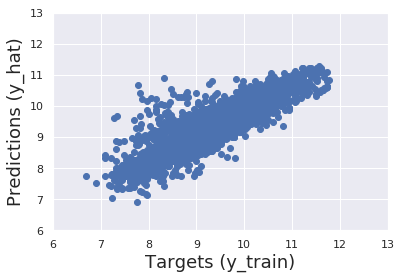

In [54]:
plt.scatter(y_train, y_hat)
plt.xlabel('Targets (y_train)', size=18)
plt.ylabel('Predictions (y_hat)', size=18)
plt.xlim(6,13)
plt.ylim(6,13)
plt.show()

Text(0.5, 1.0, 'Residuals PDF')

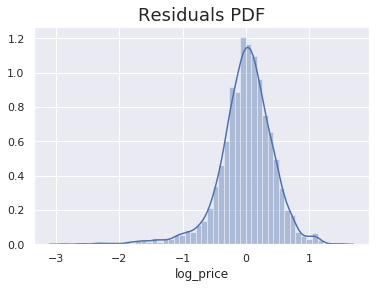

In [55]:
# Residual plot- Differenced between targets and the predictions
sns.distplot(y_train - y_hat)
plt.title("Residuals PDF", size=18)

On the left size there is a long tails. There are certain observations for which y_train, y_hat is much lower than the mean.
Which means, a much higher price is predicted than is observed.

#### Lets check the R-squared

In [56]:
reg.score(x_train,y_train)

0.744996578792662

- Result is about 75%, which means our model explains 75% variability of data. This good result.
- However,we can still improve this model.

#### Finding the weights and bias

In [57]:
reg.intercept_

9.415239458021299

In [58]:
reg.coef_

array([-0.44871341,  0.20903483,  0.0142496 ,  0.01288174, -0.14055166,
       -0.17990912, -0.06054988, -0.08992433, -0.1454692 , -0.10144383,
       -0.20062984, -0.12988747, -0.16859669, -0.12149035, -0.03336798,
       -0.14690868,  0.32047333])

In [60]:
reg_summary=pd.DataFrame(inputs.columns.values, columns=['Features'])
reg_summary['Weights']= reg.coef_
reg_summary

,Features,Weights
0,Mileage,-0.448713
1,EngineV,0.209035
2,Brand_BMW,0.014250
3,Brand_Mercedes-Benz,0.012882
4,Brand_Mitsubishi,-0.140552
5,Brand_Renault,-0.179909
6,Brand_Toyota,-0.060550
7,Brand_Volkswagen,-0.089924
8,Body_hatch,-0.145469
9,Body_other,-0.101444


WEIGHT INTERPRETATION

CONTINUOUS VARIABLES
- A positive weight shows that as a feature increases in value, so do the log_price and price respectively.
- Example: the bigger the engine volume, the higher the price


- A Negative weight shows that a feature increases in value,log_price and price decreases.
- Example: mileage, the more the car is driven the lower the price gets
    



DUMMY VARIABLES
- A positive weight shows that the respective category (Brand) is more expansive than the benchmark(Audi)
- Example: A BMW car will be more expansive than Audi
    
- A negative weight shows that the respective category (Brand) is less expansive than the benchmark(Audi)
- Example: A Mitsubishi will be less expansive than Audi
    

### TESTING - Lets check how our model performs

In [63]:
# Finally, let's manually check these predictions
# To obtain the actual prices, we take the exponential of the log_price
df_pf = pd.DataFrame(np.exp(y_hat_test), columns=['Prediction'])
df_pf.head()

,Prediction
0,10685.501696
1,3499.255242
2,7553.285218
3,7463.963017
4,11353.490075
